### APS1070 Project 1 --- Basic Principles and Models
**Deadline: Oct 4th, 11PM - 10 percent**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself without proper acknowledgment of the source, including generated code (please refer to the course syllabus). Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Name: Mengyang Liu

##**Marking Scheme:**

This project is worth **10 percent** of your final grade.

Draw a plot or table where necessary to summarize your findings.

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).




### How to submit **(HTML + IPYNB)**

1. Check that the completed `.ipynb` file runs correctly when using `Runtime -> Run All`.

2. Download your notebook: `File -> Download .ipynb`

3. Click on the Files icon on the far left menu of Colab

4. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


5. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

6. An HTML version of your notebook will appear in the files, so you can download it.

7. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858



# Project 1 [10 Marks]
Let's apply the tools we have learned in the tutorial to a new dataset.

We're going to work with the [California housing dataset](https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html). This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population
of 600 to 3,000 people). The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).


Download the dataset using the cells below:

In [1]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import matplotlib.pyplot as plt
dataset = fetch_california_housing()

## Part 1: Getting started [2.5 Marks]
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings. If you need help, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. **[0.4]**

* How many features do we have in this dataset? 8
* Determine the median target value. 1.797
* How many individuals have a target value greater than the median target value? 10317


Now add an additional column containing either 0 (if the target value is below the median or equal to the median) or 1 (if the target value is greater than the median). This will be the new target value to classify the data as images with a digit below median or above median. **[0.5]**

In [2]:
# Come up with a new dataset with two more columns, target and target-class
import pandas as pd
data = dataset.data
target = dataset.target
feature_names = dataset.feature_names
df = pd.concat([pd.DataFrame(data, columns=feature_names), pd.DataFrame(target, columns=['target'])], axis=1)
# print(df)
print('Number of features', data.shape[1])
print('Median target value', df['target'].median())
print('Number of individuals with target value greater than the median', df[df['target'] > df['target'].median()].shape[0])
df['target_class'] = np.where(df['target'] > df['target'].median(), 1, 0)
df


Number of features 8
Median target value 1.797
Number of individuals with target value greater than the median 10317


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,target_class
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,1
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,1
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,1
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,1
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,0
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,0
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,0
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,0


### Splitting the data
It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however.)

**Split the dataset** into a train and a test set **"70:30"**, use **``random_state=1``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[0.5]**

**Only Split the dataset once within you notebook.** You should not use the `train_test_split` function more than once, regardless of the random state. Keep this in mind for your future projects as well.

In [3]:
from sklearn.model_selection import train_test_split

# Select data only from the first eight columns
feature_data = df.iloc[:, :-2]

# Select new formed column as response data
target_data = df['target_class']

#Name each columns
feature_names = dataset.feature_names

# Split with train:test as 70:30
X_train, X_test, y_train, y_test = train_test_split(feature_data, target_data, test_size=0.3, random_state=1)

# Confirm the testing and training data size
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14448, 8), (6192, 8), (14448,), (6192,))

### Effect of Standardization (Visual)
Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the training set. Draw a plot where the x-axis is `Population`, and the y-axis is `Latitude`, and the color of each datapoint indicates its class.  **[0.5]**

Standardizing the data is often critical in machine learning. Show a plot as above, but standardize the two features. What's different? **why do they look similar?** Based on your observation, what is the advantage of standardization? **[0.6]**




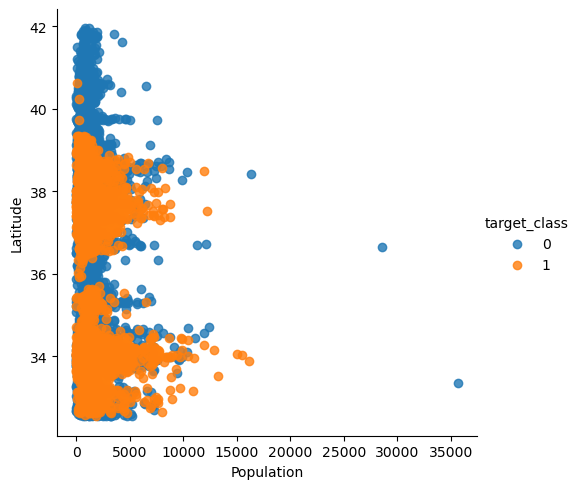

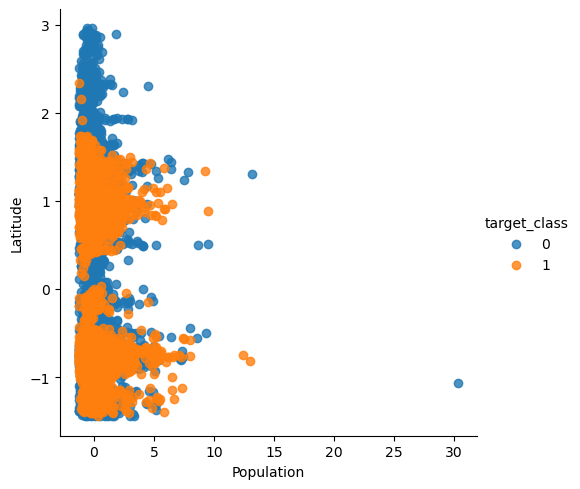

In [4]:
# Plot of Population and Latitude within two target groups
import seaborn as sns
sns.lmplot(x='Population', y='Latitude', data=df, hue='target_class', fit_reg=False)
plt.show()

# Visualization with standarization
Pop_mean = X_train['Population'].mean()
Lat_means = X_train['Latitude'].mean()
Pop_std = X_train['Population'].std()
Lat_std = X_train['Latitude'].std()
Pop_standarized = X_train.Population.map(lambda p: (p - Pop_mean)/Pop_std)
Lat_standarized = X_train.Latitude.map(lambda p: (p - Lat_means)/Lat_std)
Data_standarized = pd.concat([Pop_standarized, Lat_standarized, df['target_class']], axis=1)

sns.lmplot(x='Population', y='Latitude', data=Data_standarized, hue='target_class', fit_reg=False)
plt.show()

There is not much difference between the distribution of the original data and the standarized one. The standardized and original data look similar because standardization preserves the relationships between variables but changes the scale. Standardization adjusts the data to have a mean of 0 and a standard deviation of 1 without altering the trends. The standardization could ensure the variables with larger ranges don’t dominate and allow all variables to have equal impact in the analysis.

## Part 2: KNN Classifier without Standardization [2 Marks]
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether the digit written on the image is less than the median or greater than the median.

Follow these steps:

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 1000 (feel free to use a step size larger than 1), and show a plot of the mean cross-validation accuracy vs `k`. **[1]**
2.   What is the best `k`? What is the highest cross-validation accuracy? **[0.5]**
3. Comment on  which ranges of `k` lead to underfitted or overfitted models (hint: compare training and validation curves!). **[0.5]**



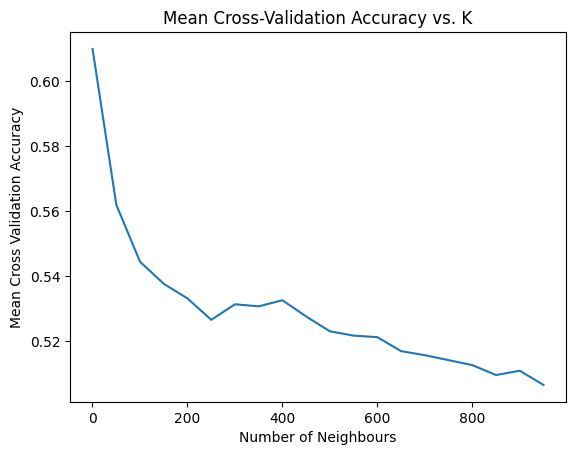

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

# Generate a list of k from 1-1000 with stepsize of 50
k = []
for j in range(1, 1001, 50):
    k.append(j)

# Using empty lists for preparation of the mean cross-validation validation score and mean cross-validation train score
mean_cross_validation_score = []
mean_train_validation_score = []

# Knn cross validation with training data
for i in range(0, len(k)):
    knn = KNeighborsClassifier(n_neighbors=k[i])
    scores = cross_validate(knn, X_train, y_train, cv=5, return_train_score=True)
    mean_cross_validation_score.append(scores['test_score'].mean())
    mean_train_validation_score.append(scores['train_score'].mean())

# Plotting the mean cross-validation score
plt.plot(k, mean_cross_validation_score, label='Cross Validation Accuracy')
plt.xlabel('Number of Neighbours')
plt.ylabel('Mean Cross Validation Accuracy')
plt.title('Mean Cross-Validation Accuracy vs. K')
plt.show()

In [11]:
# Part 2.2
# Get the best k and the accuracy under this case
highest_accuracy = max(mean_cross_validation_score)
index_of_highest = mean_cross_validation_score.index(highest_accuracy)
best_k = k[index_of_highest]
print('The best k is:', best_k)
print('The highest cross-validation accuracy is:', highest_accuracy)

The best k is: 1
The highest cross-validation accuracy is: 0.6098409310581481


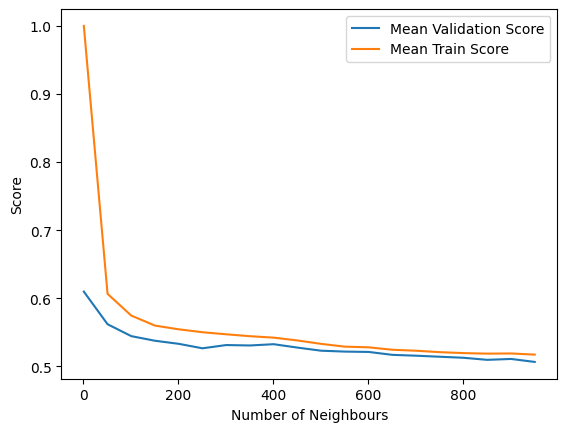

In [12]:
# Part 2.3
# Plot the number of neighbour v.s mean cross-validation validation score and mean cross0validation train score
plt.plot(k, mean_cross_validation_score,label = 'Mean Validation Score')
plt.plot(k, mean_train_validation_score,label = 'Mean Train Score')
plt.legend()
plt.xlabel('Number of Neighbours')
plt.ylabel('Score')
plt.show()

The graph shows overfitting for small values of k (0-100), where the training score is much higher than the validation score, indicating that the model performs well on the training data but poorly on testing data. For larger value of k (600-900), both the training and validation scores are low and close together which indicates underfitting. In this range, the model is too simple to capture meaningful patterns in the data and lead to poor performance on both training and validation sets. Between k values of 200 and 400, the gap between training and validation scores narrowing, suggesting an optimal trade-off between bias and variance. So it represents a more generalizable balanced model.

## Part 3: Feature Selection [3 Marks]
In this part, we aim to investigate the importance of each feature on the final classification accuracy.
If we want to try every possible combination of features, we would have to test  $2^F$ different cases,  where F is the number of features, and in each case, we have to do a hyperparameter search (finding K, in KNN using cross-validation). That will take days!.

To find more important features we will use a decision tree. based on a decision tree we can compute feature importance that is a metric for our feature selection (code is provided below).

You can use [this link](https://machinelearningmastery.com/calculate-feature-importance-with-python/
) to get familiar with extracting the feature impotance order of machine learning algorithms in Python.

After we identified and removed the least important feature and evaluated a new KNN model on the new set of features, if the stop conditions (see step 7 below) are not met, we need to repeat the process and remove another feature.


Design a function ( `Feature_selector`) that accepts your dataset (X_train , y_train) and a threshold as inputs and: **[1]**
1. Fits a decision tree classifier on the training set.

2. Extracts the feature importance order of the decision tree model.

3. Removes the least important feature based on step 2.
4. Then, a KNN model is trained on the remaining features. The number of neighbors (`k`) for each KNN model should be tuned using a 5-fold cross-validation.
5. Store the best `mean cross-validation` score and the corresponding `k` (number of neighbours) value in two lists.
6. Go back to step 3 and follow all the steps until you meet the stop condition (step 7).

7. We will stop this process when (1) there is only one feature left, or (2) our cross-validation accuracy is dropped significantly compared to a model that uses all the features. In this function, we accept a threshold as an input argument. For example, if threshold=0.95 we do not continue removing features if our mean cross-validation accuracy after tuning `k` is bellow **0.95 $\times$ Full Feature cross-validation accuracy**.

8. Your function returns the list of removed features, and the corresponding mean cross-validation accuracy and `k` value when a feature was removed.

* Visualize your results by plotting the mean cross-validation accuracy (with a tuned `k` on y axis) vs. the number of features (x axis). This plot describes: what is the best cv score with 1 feature, 2 features, 3 features ... and all the features. **[0.5]**

* Plot the best value of `k` (y-axis) vs. the number of features. This plot explains the trend of number of neighbours with respect to the number of features.  **[0.5]**

* State what is the number of essential features for classification and justify your answer. **[1]**
  
  









You can use the following piece of code to start training a decision tree classifier and obtain its feature importance order.
```
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
importance = dt.feature_importances_
```


In [5]:
# For test only
from sklearn import tree  
dt = tree.DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
importance = pd.DataFrame(data=dt.feature_importances_, index=dataset.feature_names, columns=['score'])
importance = importance.sort_values(by='score', ascending=True)
print(importance.index)
print(importance.iloc[:, :])
print(importance.iloc[1:, :])

Index(['Population', 'AveBedrms', 'HouseAge', 'AveRooms', 'AveOccup',
       'Latitude', 'Longitude', 'MedInc'],
      dtype='object')
               score
Population  0.039337
AveBedrms   0.043999
HouseAge    0.054850
AveRooms    0.062307
AveOccup    0.133556
Latitude    0.138515
Longitude   0.156927
MedInc      0.370509
              score
AveBedrms  0.043999
HouseAge   0.054850
AveRooms   0.062307
AveOccup   0.133556
Latitude   0.138515
Longitude  0.156927
MedInc     0.370509


In [8]:
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

def Feature_selector (X_train, y_train, tr):
    dt = tree.DecisionTreeClassifier()
    # Fit the model to gain the importance
    dt.fit(X_train,y_train)
    importance = pd.DataFrame(data=dt.feature_importances_, index=dataset.feature_names, columns=['score'])
    # Sort the features ASCENDINGLY by the socre
    importance = importance.sort_values(by='score', ascending=True)

    # Start the best knn score with the full model which k = 1
    knn = KNeighborsClassifier(n_neighbors=1)
    cv_score = cross_validate(knn, X_train, y_train, cv=5, return_train_score=True)
    score = max([cross_validate(knn, X_train[importance.index], y_train, cv=5, return_train_score=True)])
    full_feature_score = score['test_score'].mean()

    # Prepare a list of the best K using knn
    best_k = [1]
    # Prepare a list for the best accuracy scores of knn
    best_knn_scores = [full_feature_score]
    # Prepare a list for the features that are removed
    removed = ['']


    # Looping until only one feature left or if our mean cross-validation accuracy after tuning k is bellow threshold times the full feature cross-validation accuracy
    while len(importance)>1 and best_knn_scores[-1] > full_feature_score*tr:
        # Get the removed feature and leave the rest for frurther use
        removed.append(importance.iloc[0].name)
        importance = importance.iloc[1:, :]
        # Prepare a list for the knn score after each time's featrue removing process
        knn_scores = []

        # Get knn score using the input data (only use the remaining featrues that are considered as undropable)
        for n in list(range(1,101)): # I choose to keep the range between 1-100 instead of 1-1000 to improve efficiency of the code
            knn = KNeighborsClassifier(n_neighbors=n)
            score = cross_validate(knn, X_train[importance.index], y_train, cv=5, return_train_score=True)
            knn_scores.append(score['test_score'].mean())
        best_knn_scores.append(max(knn_scores))
        best_k.append(knn_scores.index(max(knn_scores)) + 1)

    # End the while loop by collecting the information needed
    func = lambda a, b, c, p: (a[p], b[p], c[p])
    output = [func(removed, best_k, best_knn_scores, i) for i in range(len(removed))]
    return output


In [10]:
out = Feature_selector(X_train, y_train, 0.95)
out = pd.DataFrame(out, columns=['Removed Feature', 'KNN Neighbor Count', 'KNN Accuracy'])
out

,Removed Feature,KNN Neighbor Count,KNN Accuracy
0,,1,0.609841
1,Population,16,0.847246
2,AveBedrms,16,0.847107
3,HouseAge,15,0.874170
4,AveRooms,9,0.874793
5,AveOccup,7,0.860397
6,Latitude,13,0.805716
7,Longitude,80,0.744463


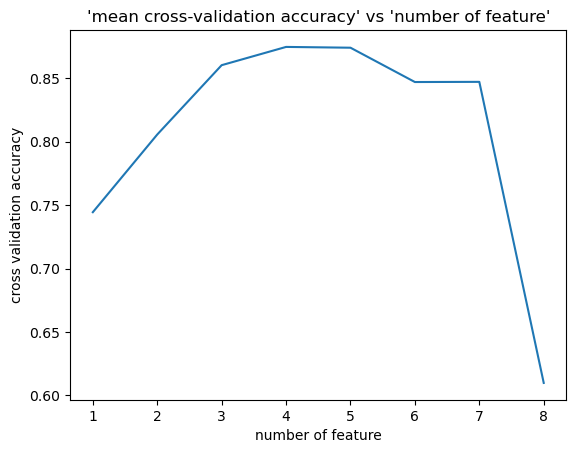

In [11]:
# Plot of 'mean cross-validation accuracy' vs 'number of feature'
num_feat = list(range(8,0,-1))

plt.plot(num_feat, out['KNN Accuracy'])
plt.xlabel('number of feature')
plt.ylabel('cross validation accuracy')
plt.title("'mean cross-validation accuracy' vs 'number of feature'")
plt.show()

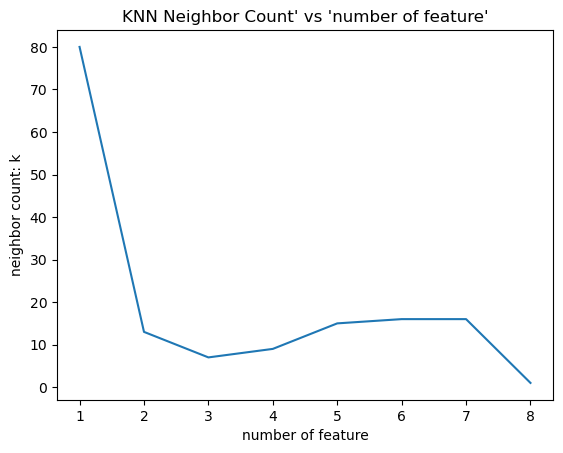

In [13]:
# Plot of 'KNN Neighbor Count' vs 'number of feature'
plt.plot(num_feat, out['KNN Neighbor Count'])
plt.xlabel('number of feature')
plt.ylabel('neighbor count: k')
plt.title("KNN Neighbor Count' vs 'number of feature'")
plt.show()

According to the result I've got, there are 2-7 essential features as the CV accuracy result can maintain in values higher than 80%. Features like 'MedInc','AveBedrms', 'HouseAge', 'AveRooms' are especially important. With these essential features, I consider the best number of features should be around 4 for the highest CV accuracy.

## Part 4: Standardization [1 Marks]

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one.

**Note:** When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but it should work fine.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Standardize the training  and test data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html))

2. Call your ``Feature_selector`` function on the standardized training data with a threshold of 95\%.
 * Plot the Cross validation accuracy when we have the standardized data (this part) and the original training data (last part) vs. the Number of features in a single plot (to compare them easily).

3. Discuss how standardization (helped/hurt) your model and its performance? Discuss which cases lead to a higher cross validation accuracy (how many features? which features? What K?)


In [6]:
### YOUR CODE HERE ###
# Standardize the data
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
x_sd_train = scaler.fit_transform(X_train)
x_sd_train = pd.DataFrame(x_sd_train, columns=dataset.feature_names)
x_sd_test = scaler.transform(X_test)

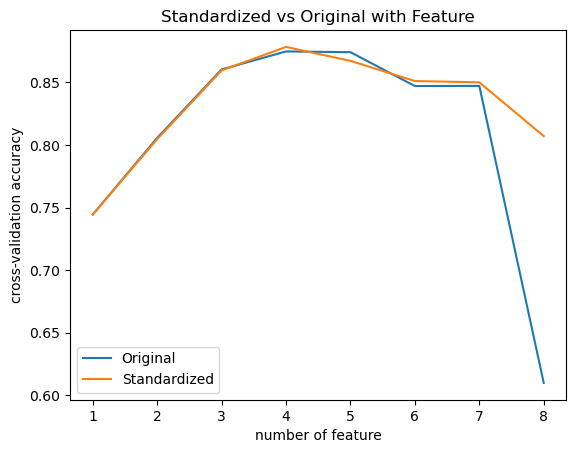

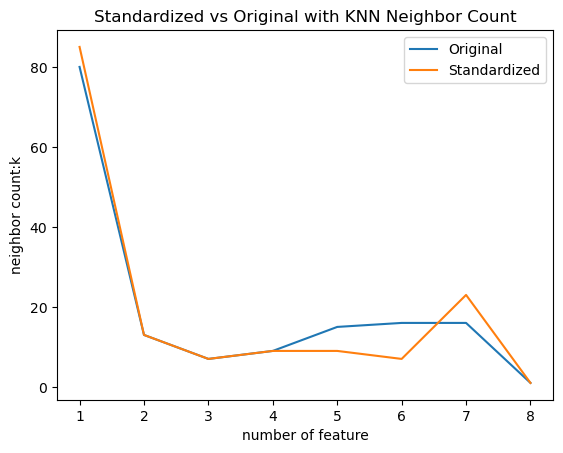

In [15]:
# Using feature selector on standardized data
out_sd = Feature_selector(x_sd_train, y_train, 0.95)
out_sd = pd.DataFrame(out_sd, columns=['Removed Feature', 'KNN Neighbor Count', 'KNN Accuracy'])

# Plot of 'mean cross-validation accuracy' vs 'number of feature'
plt.plot(num_feat, out['KNN Accuracy'], label = 'Original')
plt.plot(num_feat, out_sd['KNN Accuracy'], label = 'Standardized')
plt.ylabel('cross-validation accuracy')
plt.xlabel('number of feature')
plt.title("Standardized vs Original with Feature")
plt.legend()
plt.show()

# Plot of 'KNN Neighbor Count' vs 'number of feature'
plt.plot(num_feat, out['KNN Neighbor Count'], label = 'Original')
plt.plot(num_feat, out_sd['KNN Neighbor Count'], label = 'Standardized')
plt.ylabel('neighbor count:k')
plt.xlabel('number of feature')
plt.title("Standardized vs Original with KNN Neighbor Count")
plt.legend()
plt.show()

In [16]:
out_sd

,Removed Feature,KNN Neighbor Count,KNN Accuracy
0,,1,0.807102
1,Population,23,0.850084
2,AveBedrms,7,0.851122
3,HouseAge,9,0.867248
4,AveRooms,9,0.878392
5,AveOccup,7,0.859635
6,Latitude,13,0.804747
7,Longitude,85,0.744533


By the plot of the Cross validation accuracy with the standardized data and the original training data compared vs. the number of features, it's clear that the standardization helped to stablize the accuracy above 74%. However, standardization does not lead to better CV accuracy as 2 more features are dropped. It increase the accuracy for full feature model and one-feature-dropped case. Although the standardization process lower the maximum CV accuracy, the overall performance is better, so I think it's helpful. For the original case, model with feature of 'MedInc', 'AveOccup', 'Latitude' and	'Longitude', for k = 9 shows the highest CV accurcy of 0.878392. For the standardized case, its using the same features and k for the highest CV accuracy of 0.874793.

## Part 5: Decision Tree Classifier [1 Mark]

Train a decision tree classifier on the standardized dataset (read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and check the example there.) Tune the `max_depth` and `min_samples_split` parameters of the tree using cross-validation (CV).
 * Compare the decision tree's performance (mean CV score) with KNN, both using all the features.


In [10]:
### YOUR CODE HERE ###
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)

# Prepare the second factor 'param_grid' of GridSearchCV which is a matrix as a dictionary
param_lists = {
    'max_depth': np.arange(start = 1, stop = 11, step = 1),
    'min_samples_split': np.arange(start = 2, stop = 61, step = 1)
    } 


# Tune the best depth and sample splits
decision_tree = GridSearchCV(tree, param_lists, cv=5)
decision_tree.fit(x_sd_train, y_train).best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_split=39, random_state=0)

In [7]:
# Using standardized training data to see the optimized Decision tree's performance (mean CV score)
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
tree_opt = DecisionTreeClassifier(max_depth = 10, min_samples_split = 39, random_state = 0)
tree_score_mean = cross_val_score(tree_opt, x_sd_train, y_train, cv = 5).mean()
print('The mean CV score of the optimized decision tree is', tree_score_mean)

The mean CV score of the optimized decision tree is 0.8486989068426833


In [12]:
# Get the accuracy of the model using standardized training data
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
scores = cross_validate(knn, x_sd_train, y_train, cv=5, return_train_score=True)
accuracy = scores['test_score'].mean()
print('The mean CV score of the optimized KNN is', accuracy)

The mean CV score of the optimized KNN is 0.807102037198729


By comparing the performance (mean CV score) between the decision tree and knn model with all features, the decision tree performs better as it has higher mean CV score. 

## Part 6: Test Data [0.5 Mark]

Now that you've created several models, pick your best one (highest CV accuracy) and apply it to the test dataset you had initially set aside. Discuss your results.

In [18]:
### YOUR CODE HERE ###
# Drop the columns of feature that are recognized in Part3 for the testing data
droplist = ['Population', 'AveBedrms', 'HouseAge', 'AveRooms']
x_test = X_test.drop(droplist, axis=1)
x_test

,MedInc,AveOccup,Latitude,Longitude
4712,3.2500,1.777244,34.06,-118.36
2151,1.9784,2.609589,36.78,-119.78
15927,4.0132,3.778325,37.73,-122.42
82,1.5208,2.298851,37.81,-122.28
8161,5.1795,2.512367,33.82,-118.13
...,...,...,...,...
11387,4.2159,2.422222,33.65,-117.98
2523,3.6429,2.835821,39.65,-122.14
18897,2.5865,2.776224,38.12,-122.25
18878,2.6098,2.735430,38.07,-122.24


In [19]:
# Get the accuracy of the model using testing data
knn = KNeighborsClassifier(n_neighbors=9)
scores = cross_validate(knn, x_test, y_test, cv=5, return_train_score=True)
accuracy = scores['test_score'].mean()
print(accuracy)

0.8622411632707079


The best model I've choose is the KNN model using features 'MedInc', 'AveOccup', 'Latitude' and	'Longitude', k = 9. The accuracy of this model using the tesing data is 0.8622411632707079.

References:

https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

https://www.analyticsvidhya.com/blog/2021/02/machine-learning-101-decision-tree-algorithm-for-classification/